In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

dm = pd.read_excel('merged.xlsx')
#dm.head()
dm.describe()
#dm.dtypes

,Unnamed: 0,Date - Day,EDLengthofStayInHrs,ESI,Age,Temp,BMI,Resp_failure,Sepsis,O2_Flow,...,HIV,Asthma,HTN,Transplant,LowIncome,obese,SBP,HR,RR,Spo2
count,536.000000,536.00000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,267.500000,13.88806,8.345149,2.167910,61.513060,99.168097,32.021698,0.425373,0.055970,2.975746,...,0.013060,0.111940,0.701493,0.016791,0.904851,0.514925,134.026119,98.951493,22.360075,94.949627
std,154.874142,9.58204,5.148477,0.568467,16.136793,3.078719,9.358712,0.494861,0.230079,5.100611,...,0.113636,0.315588,0.458031,0.128608,0.293695,0.500244,26.060879,19.580208,6.425054,4.518630
min,0.000000,1.00000,0.000000,1.000000,18.000000,37.000000,15.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,12.000000,10.000000,65.000000
25%,133.750000,5.00000,4.000000,2.000000,52.000000,98.200000,25.680000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,116.000000,86.000000,18.000000,94.000000
50%,267.500000,13.00000,7.000000,2.000000,63.000000,99.000000,30.695000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,131.500000,99.000000,20.000000,96.000000
75%,401.250000,23.00000,11.000000,3.000000,73.000000,100.200000,36.450000,1.000000,0.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,148.250000,111.000000,24.000000,98.000000
max,535.000000,31.00000,23.000000,3.000000,103.000000,103.500000,78.380000,1.000000,1.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,251.000000,176.000000,52.000000,100.000000


In [63]:
#dm.isnull().sum()

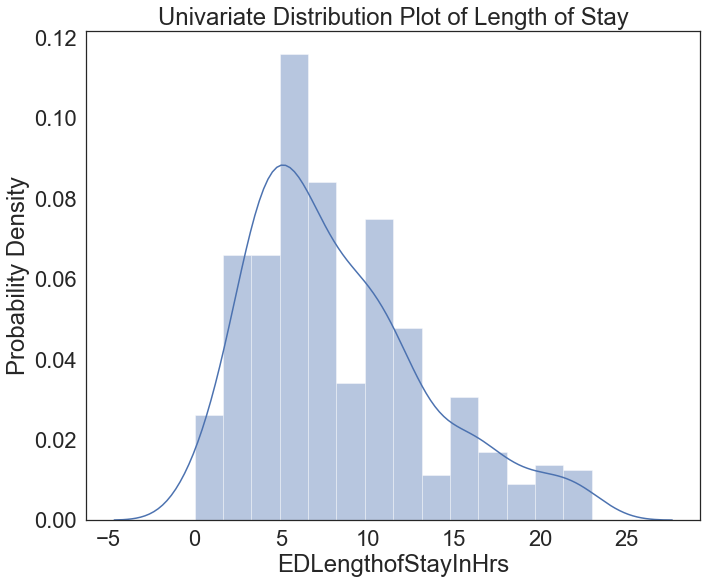

In [65]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(dm['EDLengthofStayInHrs'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

In [4]:
# Comments: As we can see, COVID-19 ED patient length of stay (LOS) values range from 0 to 25+ hrs (25 has been aggregated
# to include all LOS equal to 25hrs or longer). In addition, the distribution is right skewed, with most of the COVID-19 
# patients in the data having LOS between ~4 to 11 hrs. Next, let’s take a look at how different age groups vary in their 
# LOS distributions.

In [5]:
# Check if COVID-19 Patient LOS varies with Age

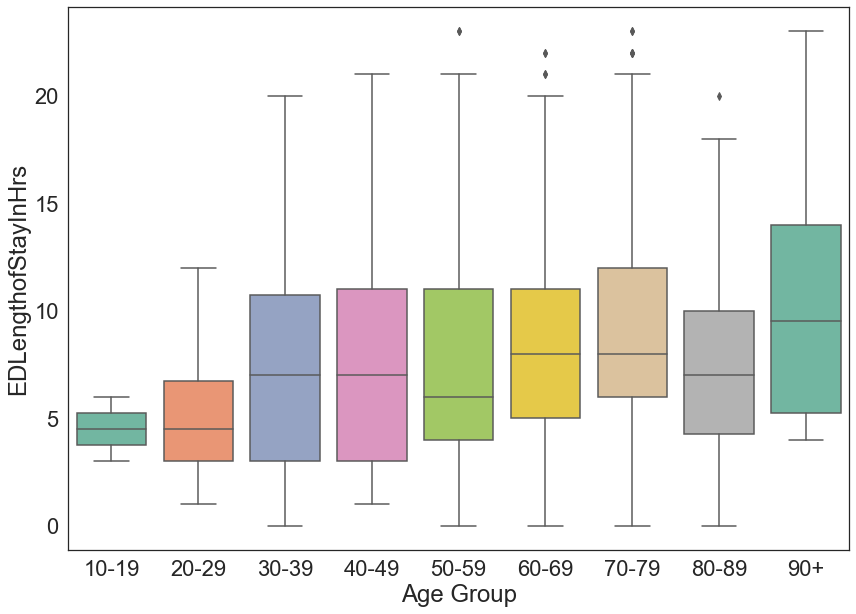

In [69]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.boxplot(x="Age Group", y="EDLengthofStayInHrs", order=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 
                 palette="Set2", data=dm)

In [7]:
# Comment: We can see the variation in the COVID-19 patients LOS as the age increases. 
# The largest spread is seen for the 30-39 and 40-49 age group followed by the 90+ age group who spend 
# more time in the ED. The median is ~8hrs for LOS

In [8]:
# As Stated on US CDC website - COVID-19 symptoms
# Symptoms may appear 2-14 days after exposure to the virus. People with these symptoms may have COVID-19:
# Fever or chills, Cough, Shortness of breath or difficulty breathing, Fatigue, Muscle or body aches,
# Headache, New loss of taste or smell, Sore throat, Congestion or runny nose, Nausea or vomiting, Diarrhea

In [9]:
# Which COVID-19 Patient Complaints have the longest ED LOS

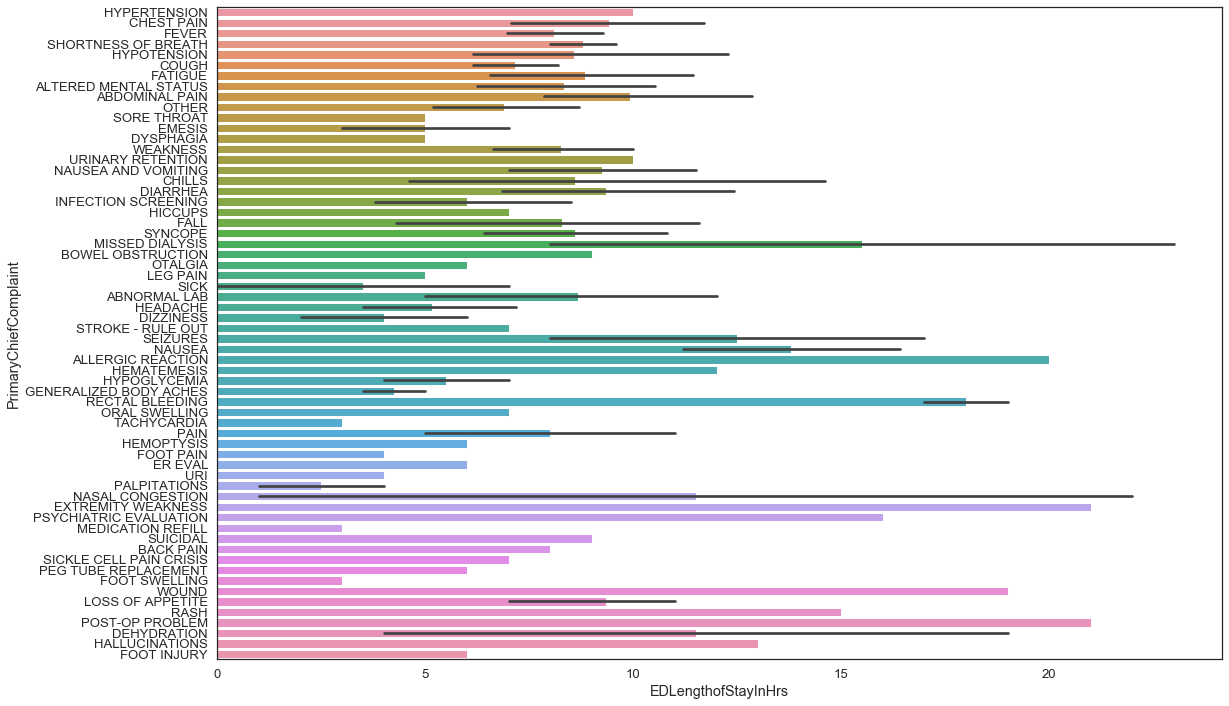

In [10]:
f, ax = plt.subplots(figsize=(18, 12))
ax = sns.barplot(x="EDLengthofStayInHrs", y="PrimaryChiefComplaint", data=dm)

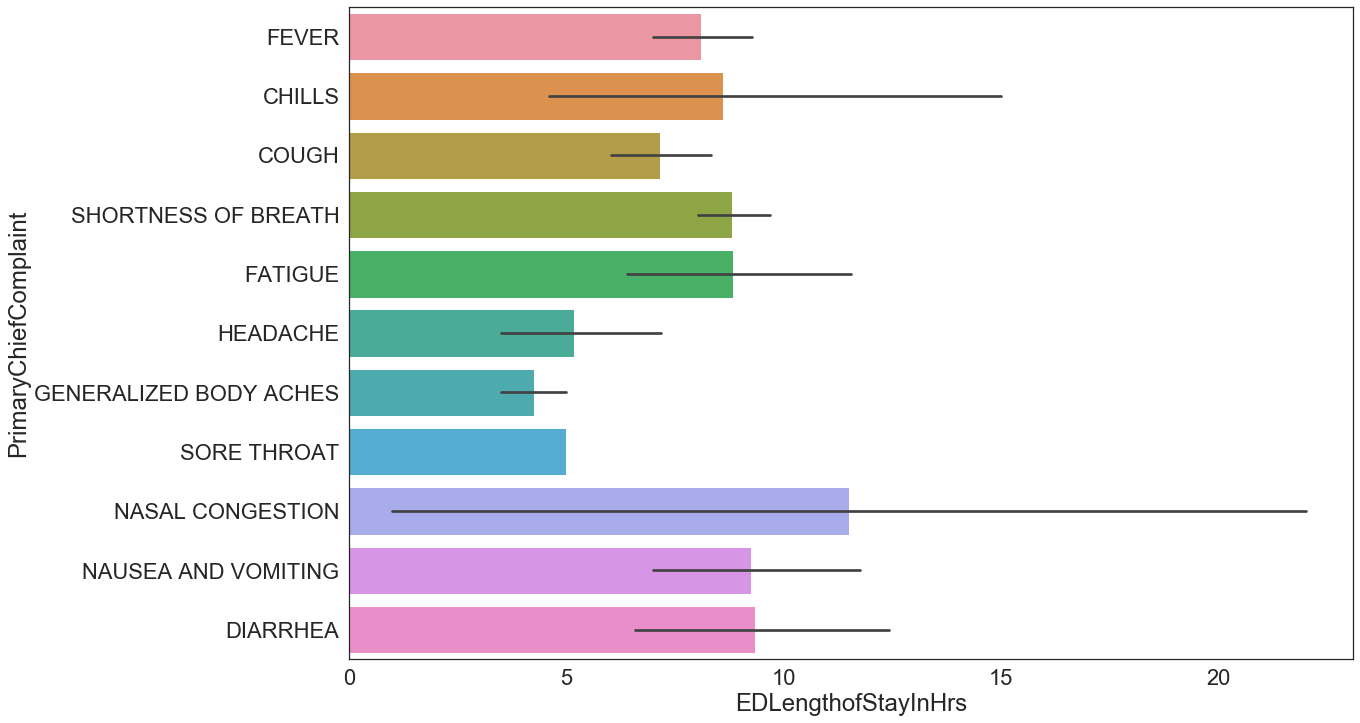

In [70]:
# Closer look with the most common symptoms as specified by CDC and seen as Primary Complaints by COVID-19 ED Patients
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 12))
ax = sns.barplot(x="EDLengthofStayInHrs", y="PrimaryChiefComplaint", order=['FEVER', 'CHILLS', 'COUGH', 'SHORTNESS OF BREATH',
                                                                           'FATIGUE', 'HEADACHE', 'GENERALIZED BODY ACHES',
                                                                           'SORE THROAT', 'NASAL CONGESTION', 'NAUSEA AND VOMITING',
                                                                           'DIARRHEA'], data=dm)

In [12]:
# Comment: On average, COVID-19 patients with complaints related to Extremity weakness and Post-Op problem have the 
# longest ED LOS, followed by those with Allergic reactions and Wound. Let’s also look at how some features, which we 
# might not expect to have much influence, vary with length of stay.

In [13]:
# COVID-19 ED Patient LOS vary with Race

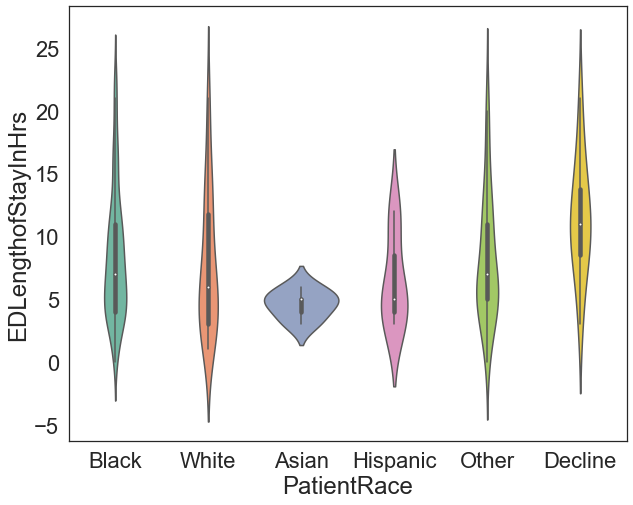

In [71]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.violinplot(data=dm, x="PatientRace", y="EDLengthofStayInHrs", order=['Black','White','Asian','Hispanic',
                                                                           'Other','Decline'],
                 orient="v", palette="Set2")

In [18]:
# Comment: We can see the variation in the COVID-19 patients LOS for the different race 
# However, it is interesting to note that White patients have the largest spread in ED LOS values but 
# African Americans (Black) patients have the highest median LOS of ~7.5 hrs. We can also see the density distribution 
# of each race group  in the data. 

In [19]:
# How does ED LOS vary with COVID-19 patient payment types?

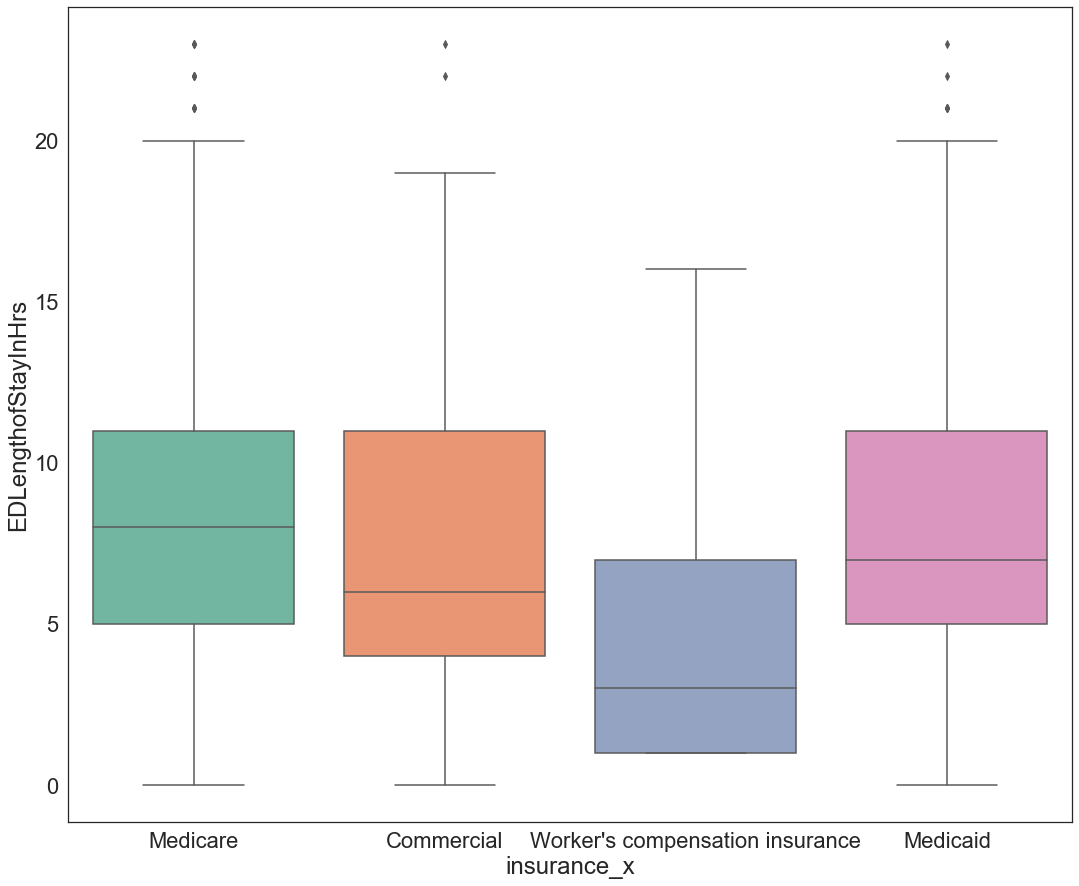

In [2]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 15))
ax = sns.boxplot(data=dm, x="insurance_x", y="EDLengthofStayInHrs", orient="v", palette="Set2")

In [21]:
# Comments: From this plot, it is evident that different health insurance forms of payment tend to have different 
# length of stay distributions. Specifically, we can see that Commercial insurance patients, for example, have the 
# largest spread. Also, we see that Medicare patients have the longest LOS with a median of ~7.5hrs. This makes us believe
# that most of the ED patients are either unemployed or older or low-income people who depend on government-based health 
# insurance. However, health insurance programs are strongly correlated with other factors, such as income and age.

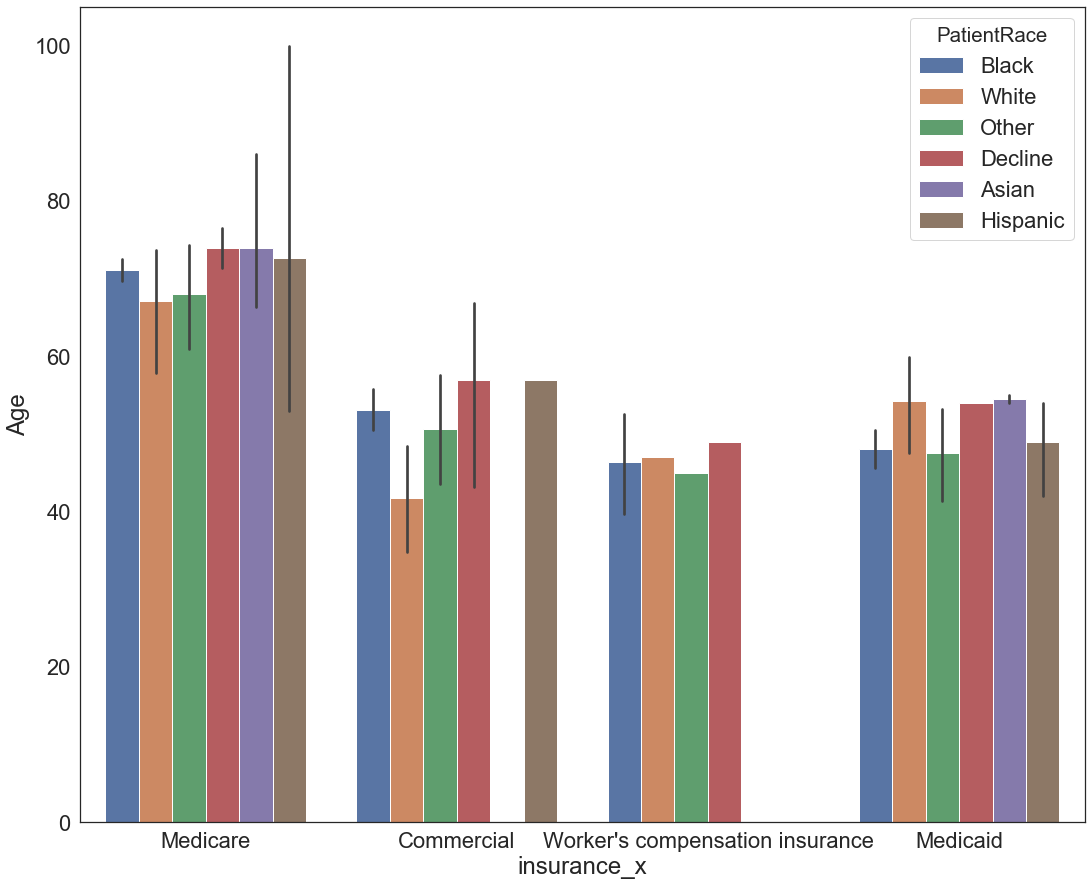

In [4]:
# Insurance vs Age
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 15))
ax = sns.barplot(x="insurance_x", y="Age", hue="PatientRace", data=dm)

In [25]:
# Comment: This chart justifies the boxplot. Older patients use the Medicare insurance as a form of payment when compared to 
# other insurance types

[Text(0, 0, '1 - Immediate'),
 Text(0, 0, '2 - Emergent'),
 Text(0, 0, '3 - Urgent')]

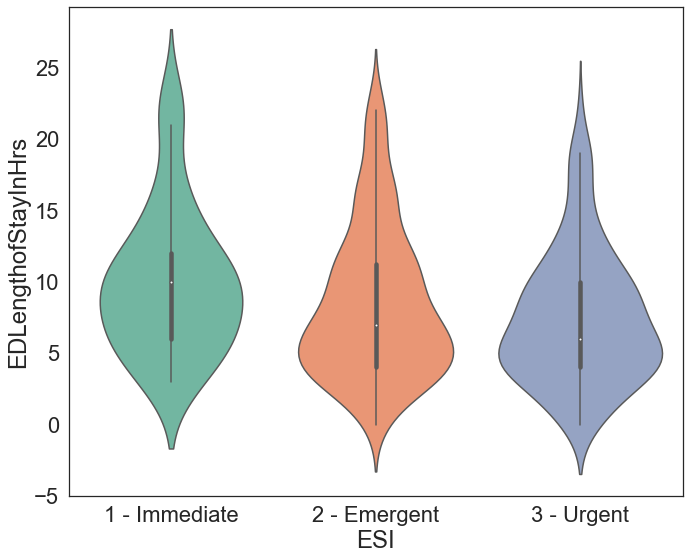

In [5]:
# Acuity Level vs. ED LOS in Hrs
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.violinplot(data=dm, x="ESI", y="EDLengthofStayInHrs", palette="Set2")
ax.set_xticklabels(['1 - Immediate', '2 - Emergent', '3 - Urgent'])

In [28]:
# Comment: The ESI is the acuity level of the patients
# 1 - Immediate; 2 - Emergent; 3 - Urgent
# Majority of the patients have an ESI score of 1 with a median ED LOS of 10 hrs. They also follow a normal distribution as
# seen  in the violin plots

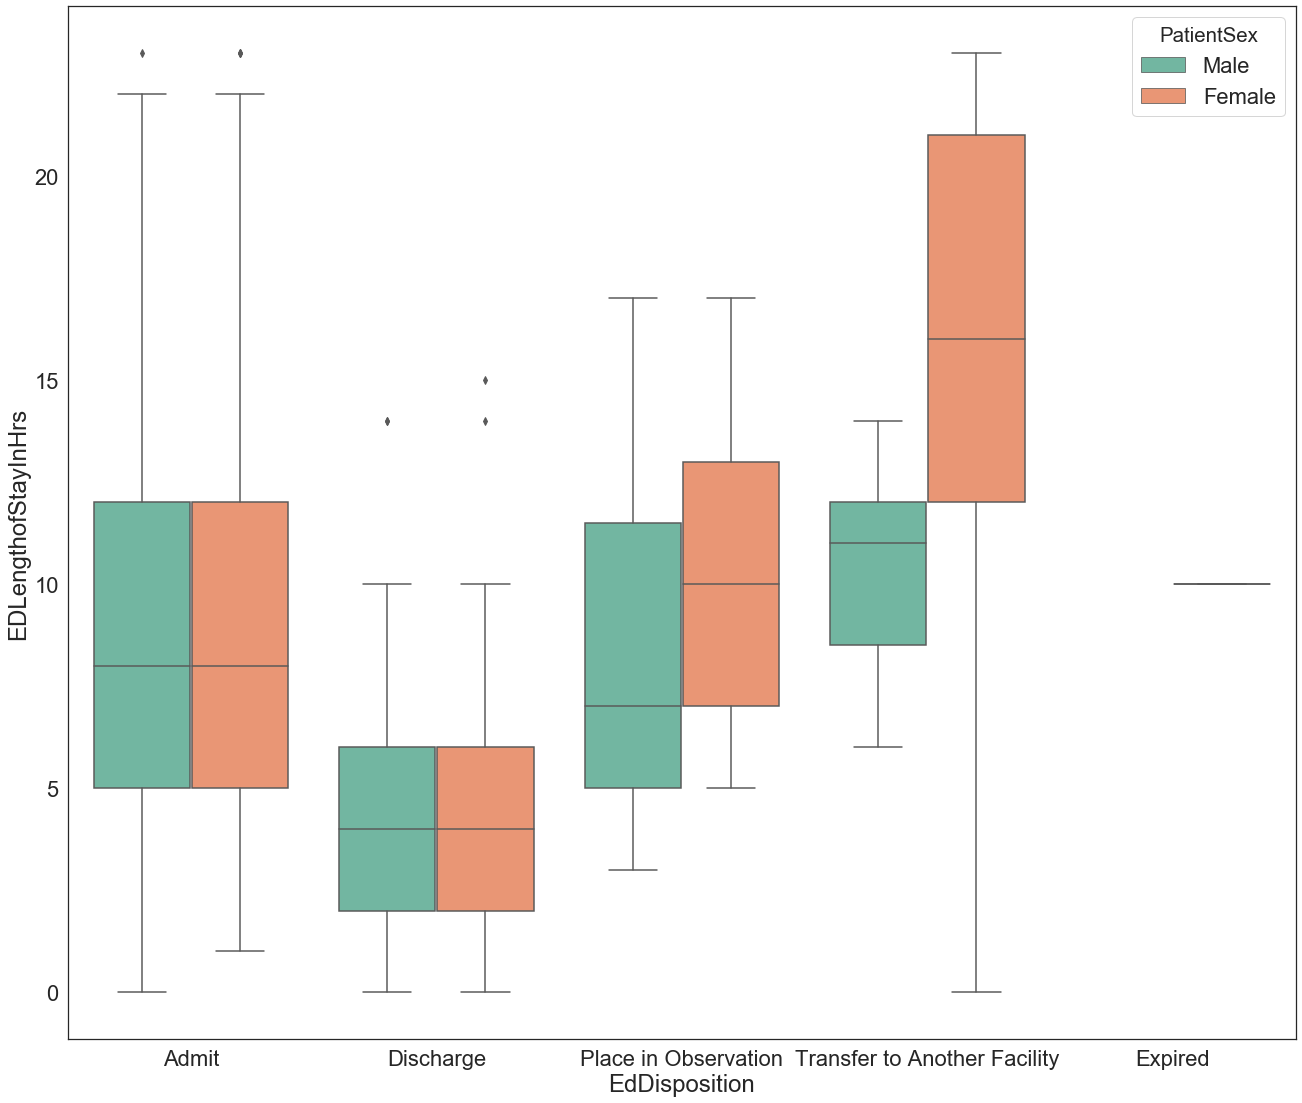

In [10]:
# ED LOS vs ED Disposition
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(22, 19))
ax = sns.boxplot(data=dm, x="EdDisposition", y="EDLengthofStayInHrs", hue="PatientSex", palette="Set2")

In [33]:
# Comment (From a race perspective): This is a very interesting visual. 
# Patients who are black are placed in observation or transferred to another facility than the other race
# With regards to patients transferred to other facilities, they are patients with mental issues

# Comment (From a Gender perspective): Both genders get admitted and discharged with a ~8 hrs and ~4.5 hrs, respectively. 
# More female patients get transferred to another facility than male patients in the ED.

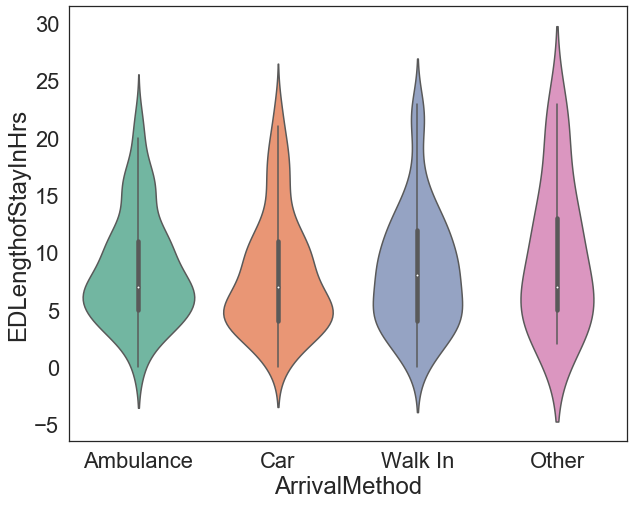

In [11]:
# Arrival Mode vs ED LOS
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.violinplot(data=dm, x="ArrivalMethod", y="EDLengthofStayInHrs", order=['Ambulance','Car','Walk In','Other'], palette="Set2")

In [27]:
# Comment: We can see the different mode of transporting patients to the ED. Patients who arrive in ambulance or car spend
# ~7.5 hrs in the ED. ~44.5 percent of patients arrrive the ED with a car than the other methods.

In [28]:
# Modeling Preparations

In [58]:
# Drop columns that are not useful for prediction modeling
dm_new = dm.drop(columns=['Date - Month', 'Date - Day', 'PatientZipCode', 'AcuityLevel', 'PrimaryDiagnosisName', 
                          'ArrivalDayofWeek','EdDisposition', 'DischargeDisposition', 'Temp', 'Age', 'Anesthesiologist Assigned',
                         'ED Tech Assigned', 'Fellow Assigned', 'Nursing Assistant', 'Resident', 'Hospitalist',
                         'Respiratory Therapist', 'Technician'])
dm_new.head()
#dm_new.dtypes

,Unnamed: 0,EDLengthofStayInHrs,PatientRace,PatientSex,ArrivalMethod,PatientClass,Bed Assigned,Age Group,PrimaryChiefComplaint,Physician,...,HIV,Asthma,HTN,Transplant,LowIncome,obese,SBP,HR,RR,Spo2
0,0,10,Black,Male,Car,Inpatient,Yes,80-89,HYPERTENSION,Yes,...,0,0,1,1,0,0,193,70,22,97
1,1,13,White,Male,Other,Inpatient,Yes,30-39,CHEST PAIN,No,...,0,0,0,0,0,1,127,108,24,95
2,2,3,Black,Female,Car,Inpatient,Yes,40-49,FEVER,Yes,...,0,0,0,0,1,1,113,109,20,94
3,3,14,Other,Male,Ambulance,Inpatient,Yes,70-79,SHORTNESS OF BREATH,No,...,0,0,1,0,0,1,139,111,37,83
4,4,18,Black,Male,Car,Inpatient,Yes,50-59,SHORTNESS OF BREATH,Yes,...,0,1,1,0,1,1,117,101,22,91


In [30]:
# Get names of indexes for which column ED LOS has value >= 10
#indexNames = dm_new[dm_new['EDLengthofStayInHrs'] >= 10].index
# Delete these row indexes from dataFrame
#dm_new.drop(indexNames , inplace=True)

In [31]:
# Feature Encoding
# Utilizing string indexing. String indexing is performed due to the fact that there is an inherent ordinality 
# to the categories within these features.
# One-hot encoding is used for the rest of the categorical features

In [32]:
# String indexing - make this one-hot encoded
#PatientClass_string_index = {'Emergency': 1, 'Inpatient': 2, 'Observation': 3, 'Outpatient': 4}
#dm_new['PatientClass'] = dm_new['PatientClass'].apply(lambda x: PatientClass_string_index[x])

In [59]:
# One-hot encoding
encoded_dm_new = pd.get_dummies(dm_new)
display(encoded_dm_new)

,Unnamed: 0,EDLengthofStayInHrs,ESI,BMI,Resp_failure,Sepsis,O2_Flow,MI,CAD,CHF,...,Physician Assistant_Yes,Registered Nurse_No,Registered Nurse_Yes,insurance_x_Commercial,insurance_x_Medicaid,insurance_x_Medicare,insurance_x_Worker's compensation insurance,Temp1_High,Temp1_Low,Temp1_Mild
0,0,10,2,21.23,1,1,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1
1,1,13,2,31.66,0,0,2,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,2,3,2,34.33,0,0,2,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,3,14,1,30.66,1,1,30,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,4,18,2,40.89,0,0,3,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,6,2,32.06,0,0,2,0,1,1,...,0,0,1,0,0,1,0,0,0,1
532,532,19,3,28.28,1,0,6,0,0,0,...,0,0,1,0,1,0,0,0,0,1
533,533,15,1,16.14,1,0,3,0,0,0,...,0,0,1,0,0,1,0,0,1,0
534,534,1,2,40.35,0,0,2,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [60]:
corr = encoded_dm_new.corr()
print(corr.EDLengthofStayInHrs)

Unnamed: 0                                     0.013379
EDLengthofStayInHrs                            1.000000
ESI                                           -0.130325
BMI                                           -0.010646
Resp_failure                                   0.134481
                                                 ...   
insurance_x_Medicare                           0.092003
insurance_x_Worker's compensation insurance   -0.099253
Temp1_High                                     0.056665
Temp1_Low                                      0.049721
Temp1_Mild                                    -0.070826
Name: EDLengthofStayInHrs, Length: 133, dtype: float64


In [35]:
# Now, let’s take a look at our predictor feature, ED length of stay (LOS)  
# Length of stay ranges from 0 to 25 hrs and only takes on integer values. 
# I decide to treat predicting COVID-19 ED patient LOS as a multi-class classification problem (instead of regression). 
# Multi-class classification yields one large advantage in comparison to regression that I utilize: the ability 
# to manually define class bins and control prediction specificity. Instead of treating LOS as having 25 different classes,
# we can group these values into bins that make more sense for predictions without a significant loss in specificity of 
# predictions. Following the exploration of multiple options for these bins,which involved trading off usefulness of the 
# model (i.e., if bins are too large, the predictions will no longer be useful) and model accuracy, I ultimately settled 
# on the following bin format: 0-3, 3-6, 6-10, 10-15, 15-20, 20-25+ hrs

In [36]:
bins = [0,4,8] #unit is hours (1,3,6,9)
encoded_dm_new['stay_bin']=pd.cut(x = encoded_dm_new['EDLengthofStayInHrs'],
                        bins = bins)
encoded_dm_new['stay_label']=pd.cut(x = encoded_dm_new['EDLengthofStayInHrs'],
                        bins = bins, labels = [4,8])
encoded_dm_new['stay_bin'] = encoded_dm_new['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_dm_new['stay_bin'] = encoded_dm_new['stay_bin'].apply(lambda x: str(x).replace('8','8+')) #make this bin more descriptive
encoded_dm_new['stay_label'] = encoded_dm_new['stay_label'].replace(np.nan, 0)
display(encoded_dm_new)
#encoded_dm_new.to_csv(r'newdata_staylabel.csv', index = False)
#0-5, 5-10, 10-15, 15-20, 20-25 (worked=improved test accuracy but still low)
#0-3, 3-6, 6-10, 10-15, 15-20, 20-25 (0,3,6,12,15,20,24) (worked=need to add more datapoints)
#0,4,8,12,16,24

,Unnamed: 0,EDLengthofStayInHrs,ESI,BMI,Resp_failure,Sepsis,O2_Flow,MI,CAD,CHF,...,Registered Nurse_Yes,insurance_x_Commercial,insurance_x_Medicaid,insurance_x_Medicare,insurance_x_Worker's compensation insurance,Temp1_High,Temp1_Low,Temp1_Mild,stay_bin,stay_label
0,0,10,2,21.23,1,1,1,0,1,1,...,1,0,0,1,0,0,0,1,NaN,0.0
1,1,13,2,31.66,0,0,2,0,0,0,...,1,1,0,0,0,1,0,0,NaN,0.0
2,2,3,2,34.33,0,0,2,0,0,0,...,0,0,0,0,1,1,0,0,(1 - 4],4.0
3,3,14,1,30.66,1,1,30,0,0,0,...,1,0,0,1,0,0,0,1,NaN,0.0
4,4,18,2,40.89,0,0,3,0,0,0,...,0,1,0,0,0,0,0,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,6,2,32.06,0,0,2,0,1,1,...,1,0,0,1,0,0,0,1,(4 - 8+],8.0
532,532,19,3,28.28,1,0,6,0,0,0,...,1,0,1,0,0,0,0,1,NaN,0.0
533,533,15,1,16.14,1,0,3,0,0,0,...,1,0,0,1,0,0,1,0,NaN,0.0
534,534,1,2,40.35,0,0,2,0,0,0,...,0,0,0,0,1,0,0,1,NaN,0.0


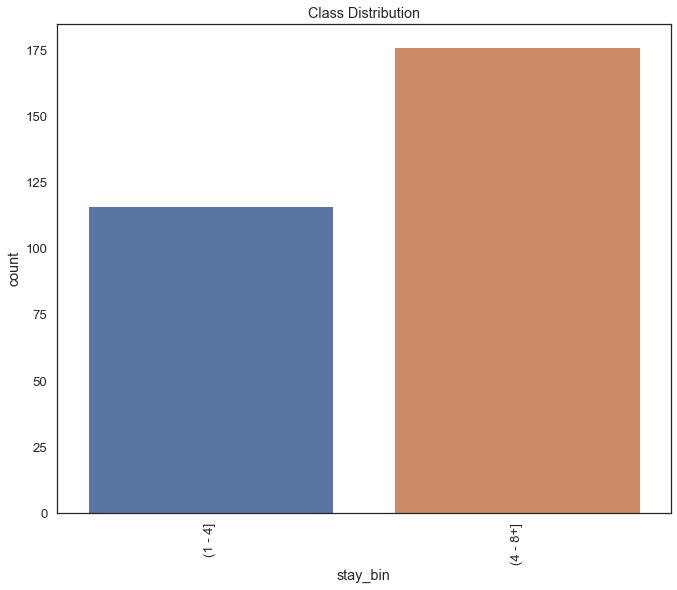

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='stay_bin', data = encoded_dm_new)
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

In [42]:
X = encoded_dm_new.drop(['EDLengthofStayInHrs', 'stay_bin', 'stay_label'], axis=1) #remove data leakage features
y = encoded_dm_new[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(y)

In [39]:
# Build a Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)

37.94137827837564
13.977403515551076


In [608]:
#Inputing the test set
#predictions = model.predict(y_test)
#predictions
#sns.regplot(y_test.EDLengthofStayInHrs.values,predictions)

In [43]:
# Principal Component Analysis

In [44]:
# Prior to training any models, I perform PCA on the data after using the StandardScaler() function to normalize 
# the train and test data sets. PCA is a powerful tool that allows us to reduce the dimensionality of a dataset, 
# which can be extremely beneficial for large datasets such as the one we are dealing with here. In addition, 
# it removes any multicollinearity in the data.

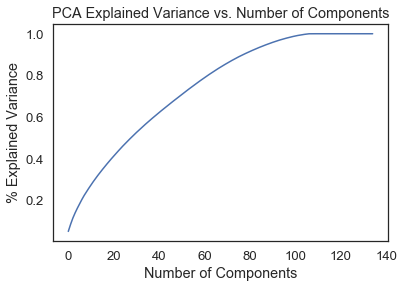

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [46]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

88


In [47]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,Unnamed: 0,ESI,BMI,Resp_failure,Sepsis,O2_Flow,MI,CAD,CHF,PVD,...,Physician Assistant_Yes,Registered Nurse_No,Registered Nurse_Yes,insurance_x_Commercial,insurance_x_Medicaid,insurance_x_Medicare,insurance_x_Worker's compensation insurance,Temp1_High,Temp1_Low,Temp1_Mild
0,0.011901,-0.12981,-0.056818,0.203142,0.063717,0.136137,0.142837,0.162726,0.167715,0.079234,...,-0.034234,0.060717,-0.060717,-0.117564,-0.098557,0.19471,-0.06585,0.029125,0.0597,-0.045918


In [48]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['PatientClass_Emergency'], ['PatientClass_Inpatient'], ['Bed Assigned_No'], ['Bed Assigned_Yes'], ['HTN'], ['Resp_failure'], ['CKD'], ['insurance_x_Medicare'], ['CHF'], ['CAD']]


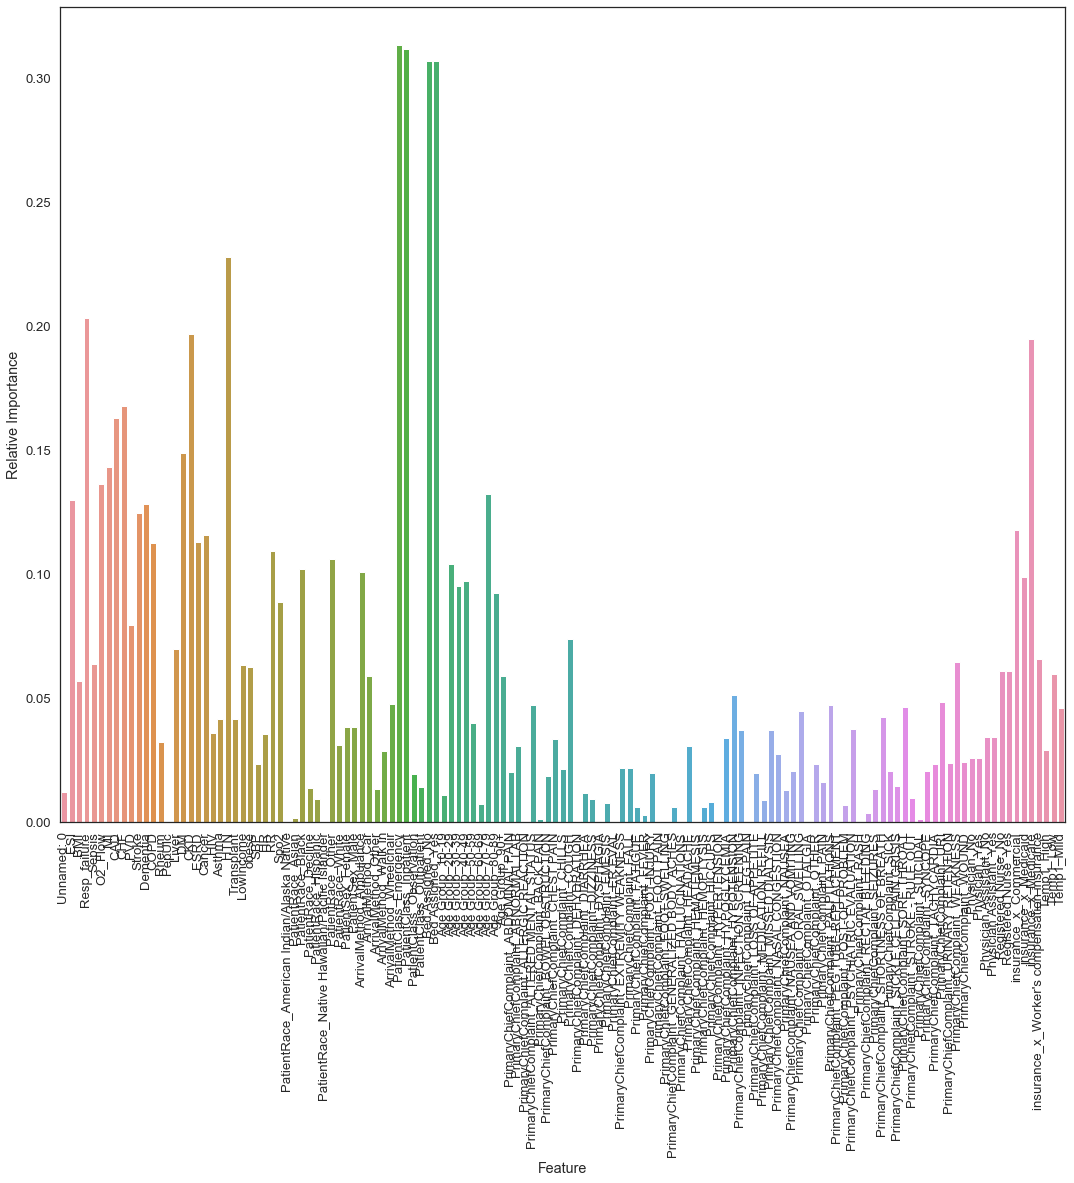

In [49]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

In [50]:
# Build a Logistic Regression Model to predict the COVID-19 ED LOS

In [51]:
pca = PCA(n_components=88) #96 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.391304347826087
Train accuracy: 0.6506666666666666


Text(0.5, 1.0, 'Confusion Matrix')

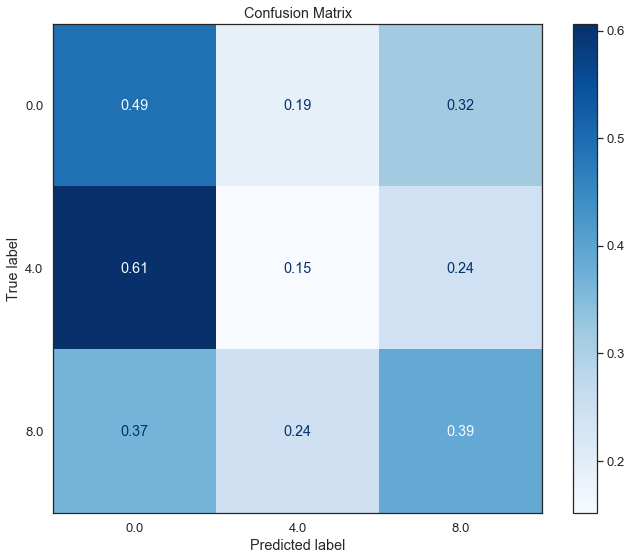

In [52]:
#Get the confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg2 = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.391304347826087
Train accuracy: 0.6506666666666666


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50        79
         4.0       0.16      0.15      0.15        33
         8.0       0.37      0.39      0.38        49

    accuracy                           0.39       161
   macro avg       0.34      0.34      0.34       161
weighted avg       0.39      0.39      0.39       161



In [55]:
# Using cross-validation method: accuracy @ 30%
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg2, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.47368421 0.26315789 0.28947368 0.34210526 0.5        0.32432432
 0.51351351 0.37837838 0.35135135 0.48648649]


(0.2631578947368421, 0.39224751066856334, 0.5135135135135135)

Text(0.5, 1.0, 'Confusion Matrix')

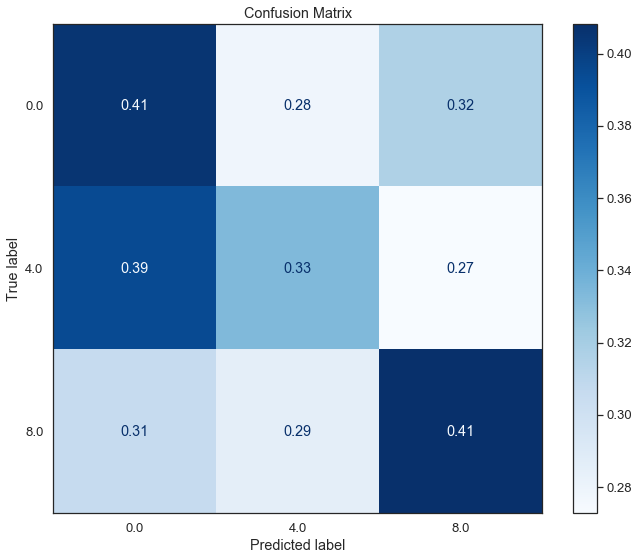

In [56]:
#Get the confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg2, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix')